##Analysing stress from Garmin Data

Jeya Varshini Bharath

###Mounting Drive 

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/DATA - Working From the Home Environment /3 Month Data/Garmin Data


/content/drive/.shortcut-targets-by-id/1bsGmv7emVk-I65dMlZ1pWzWAqISr6jvI/DATA - Working From the Home Environment /3 Month Data/Garmin Data


#### Checking the data type

In [3]:
import pandas as pd

# Path to the CSV file
csv_file_path = "/content/drive/MyDrive/DATA - Working From the Home Environment /3 Month Data/Garmin Data/garmin.11822993 2.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Print the data types for each column
print(df.dtypes)


ts           float64
dte_tme       object
rsp_id         int64
data_type     object
val            int64
dtype: object


### Extracting stress 

In [6]:
import os
import pandas as pd
# from google.colab import drive

# # Mount Google Drive
# drive.mount('/content/drive')

# Set the folder path to the directory with CSV files
folder_path = '/content/drive/MyDrive/DATA - Working From the Home Environment /3 Month Data/Garmin Data'

# Create an empty list to store DataFrames
stress_dfs = []
#ibi_dfs = []

# Loop through each file in the directory
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        # Load the CSV file into a DataFrame
        filepath = os.path.join(folder_path, filename)
        df = pd.read_csv(filepath)
        
        # Filter the DataFrame to include only rows with 'stress' in the 'datatype' column
        stress_mask = df['data_type'].str.contains('stress', case=False)
        stress_df = df[stress_mask]

        # Filter the Dataframe to include only rows with 'ibi' in the datatype column
        #ibi_mask = df['data_type'].str.contains('ibi', case=False)
        #ibi_df = df[ibi_mask]
        
        # Append the filtered DataFrame to the list
        stress_dfs.append(stress_df)
        #ibi_dfs.append(ibi_df)

# Concatenate all the filtered DataFrames into a single DataFrame
combined_stress_df = pd.concat(stress_dfs, ignore_index=True)
#combined_ibi_df = pd.concat(ibi_dfs, ignore_index=True)


In [7]:
combined_stress_df.head()

,ts,dte_tme,rsp_id,data_type,val
0,1.651782e+09,2022-05-05 16:13:51,32668.0,stress,8
1,1.651782e+09,2022-05-05 16:13:54,32668.0,stress,8
2,1.651782e+09,2022-05-05 16:13:56,32668.0,stress,7
3,1.651782e+09,2022-05-05 16:13:59,32668.0,stress,7
4,1.651782e+09,2022-05-05 16:14:01,32668.0,stress,5


In [8]:
# Print the number of rows in the combined DataFrame
print("Number of rows in the combined DataFrame:", combined_stress_df.shape[0])


Number of rows in the combined DataFrame: 10364278


###Time series analysis

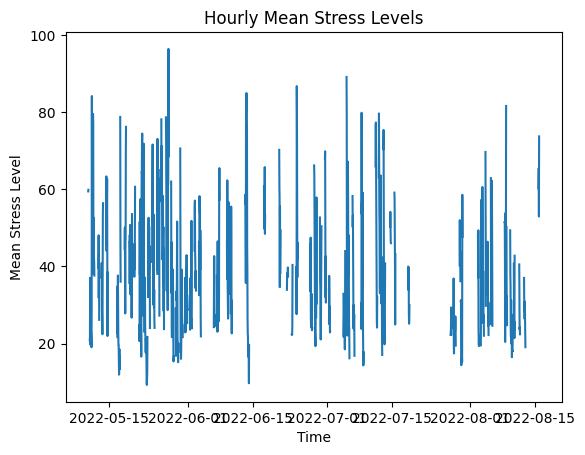

In [11]:
import matplotlib.pyplot as plt

# Convert the timestamp column to a datetime object
df['dte_tme'] = pd.to_datetime(df['dte_tme'])

# Set the timestamp column as the DataFrame index
df.set_index('dte_tme', inplace=True)

# Filter the DataFrame to include only rows with 'stress' in the 'data_type' column
stress_mask = df['data_type'].str.contains('stress', case=False)
stress_df = df[stress_mask]

# Resample the data to hourly intervals and calculate the mean stress score for each interval
hourly_mean_stress = stress_df['val'].resample('H').mean()

# Plot the hourly mean stress scores over time
plt.plot(hourly_mean_stress.index, hourly_mean_stress)
plt.xlabel('Time')
plt.ylabel('Mean Stress Level')
plt.title('Hourly Mean Stress Levels')
plt.show()
